In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Description.

column name in cleaned df | meaning 
--- | --- 
**customer** | Customer ID
**state** | US State 
**customer_lifetime_value** | CLV is the client economic value for a company during all their relationship
**response** | Response to marketing calls (customer engagement)
**coverage** | Customer coverage type
**education** | Customer education level
**effective_to_date** | Effective to date
**employmentstatus** | Customer employment status
**gender** | Customer gender
**income** | Customer income
**location_code** | Customer living zone
**marital_status:** | Customer marital status
**monthly_premium_auto:** | Monthly premium
**months_since_last_claim:** | Last customer claim
**months_since_policy_inception:** | Policy Inception
**number_of_open_complaints:** | Open claims
**number_of_policies:** | Number policies
**policy_type:** | Policy type
**policy:** | Policy
**renew_offer_type:** | Renew
**sales_channel:** | Sales channel (customer-company first contact)
**total_claim_amount:** | Claims amount
**vehicle_class:** | Vehicle class
**vehicle_size:** | Vehicle siz

**Goal: Can we predict the amount claimed by a customer in our data set?**

In [2]:
# fetch the data
df=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
df.head(3) #check data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [4]:
df.drop(df[(df['Gender'] =='M')].index, inplace=True)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head() #check data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


# Cleaning and wrangling data

In [7]:
df.shape

(4658, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658 entries, 0 to 9130
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       4658 non-null   object 
 1   State                          4658 non-null   object 
 2   Customer Lifetime Value        4658 non-null   float64
 3   Response                       4658 non-null   object 
 4   Coverage                       4658 non-null   object 
 5   Education                      4658 non-null   object 
 6   Effective To Date              4658 non-null   object 
 7   EmploymentStatus               4658 non-null   object 
 8   Gender                         4658 non-null   object 
 9   Income                         4658 non-null   int64  
 10  Location Code                  4658 non-null   object 
 11  Marital Status                 4658 non-null   object 
 12  Monthly Premium Auto           4658 non-null   i

In [9]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
# list comprehension to standerdise headers
df.columns=[h.lower().replace(' ', '_') for h in df.columns]
# here we lower all letters and we remove all empty spaces and replace them by _

In [11]:
df.rename(columns={'employmentstatus': 'employment_status'}, inplace=True, errors='raise')
# rename a specific column

# Drop the columns you don´t need / that are irrelevant

In [12]:
df=df.drop (columns=['customer', 'sales_channel']) 
# drop customer id because it´s unique
# drop sales channel because it feels irrelevant

# Exploration of data EDA

In [13]:
# how many unique values in each column
for c in df.columns:
    print(c, len(df[c].unique()))

state 5
customer_lifetime_value 4106
response 2
coverage 3
education 5
effective_to_date 59
employment_status 5
gender 1
income 3007
location_code 3
marital_status 3
monthly_premium_auto 173
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
total_claim_amount 2816
vehicle_class 6
vehicle_size 3


In [14]:
# let´s pick a column to look at
df['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

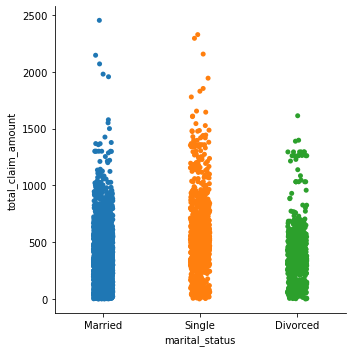

In [15]:
sns.catplot (x='marital_status', y='total_claim_amount', data=df)

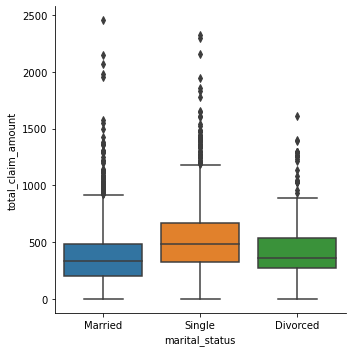

In [16]:
sns.catplot (x='marital_status', y='total_claim_amount', kind='box', data=df)

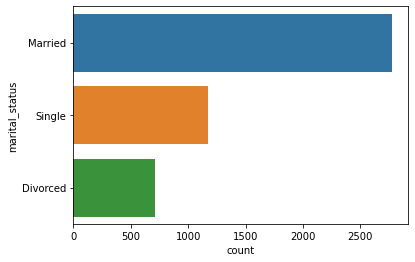

In [17]:
sns.countplot(y=df['marital_status']);

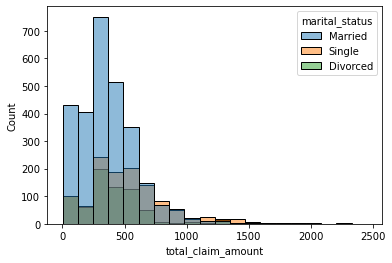

In [18]:
sns.histplot(x='total_claim_amount', hue='marital_status', bins=20, data=df);

In [19]:
summary=df.groupby ('marital_status') ['total_claim_amount'].mean()

In [20]:
summary

marital_status
Divorced    398.540202
Married     367.461359
Single      529.355025
Name: total_claim_amount, dtype: float64

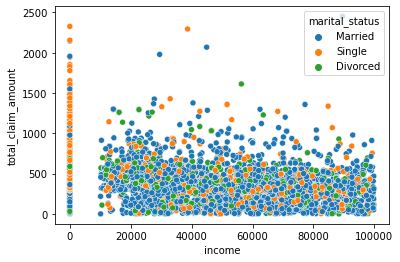

In [21]:
sns.scatterplot(data=df, x='income', y='total_claim_amount', hue='marital_status');

In [22]:
# create a list of number columns
df_num=df.select_dtypes(exclude=object)
df_cat=df.select_dtypes(include=object)

In [23]:
df_num.shape

(4658, 8)

In [24]:
df_cat.shape

(4658, 14)

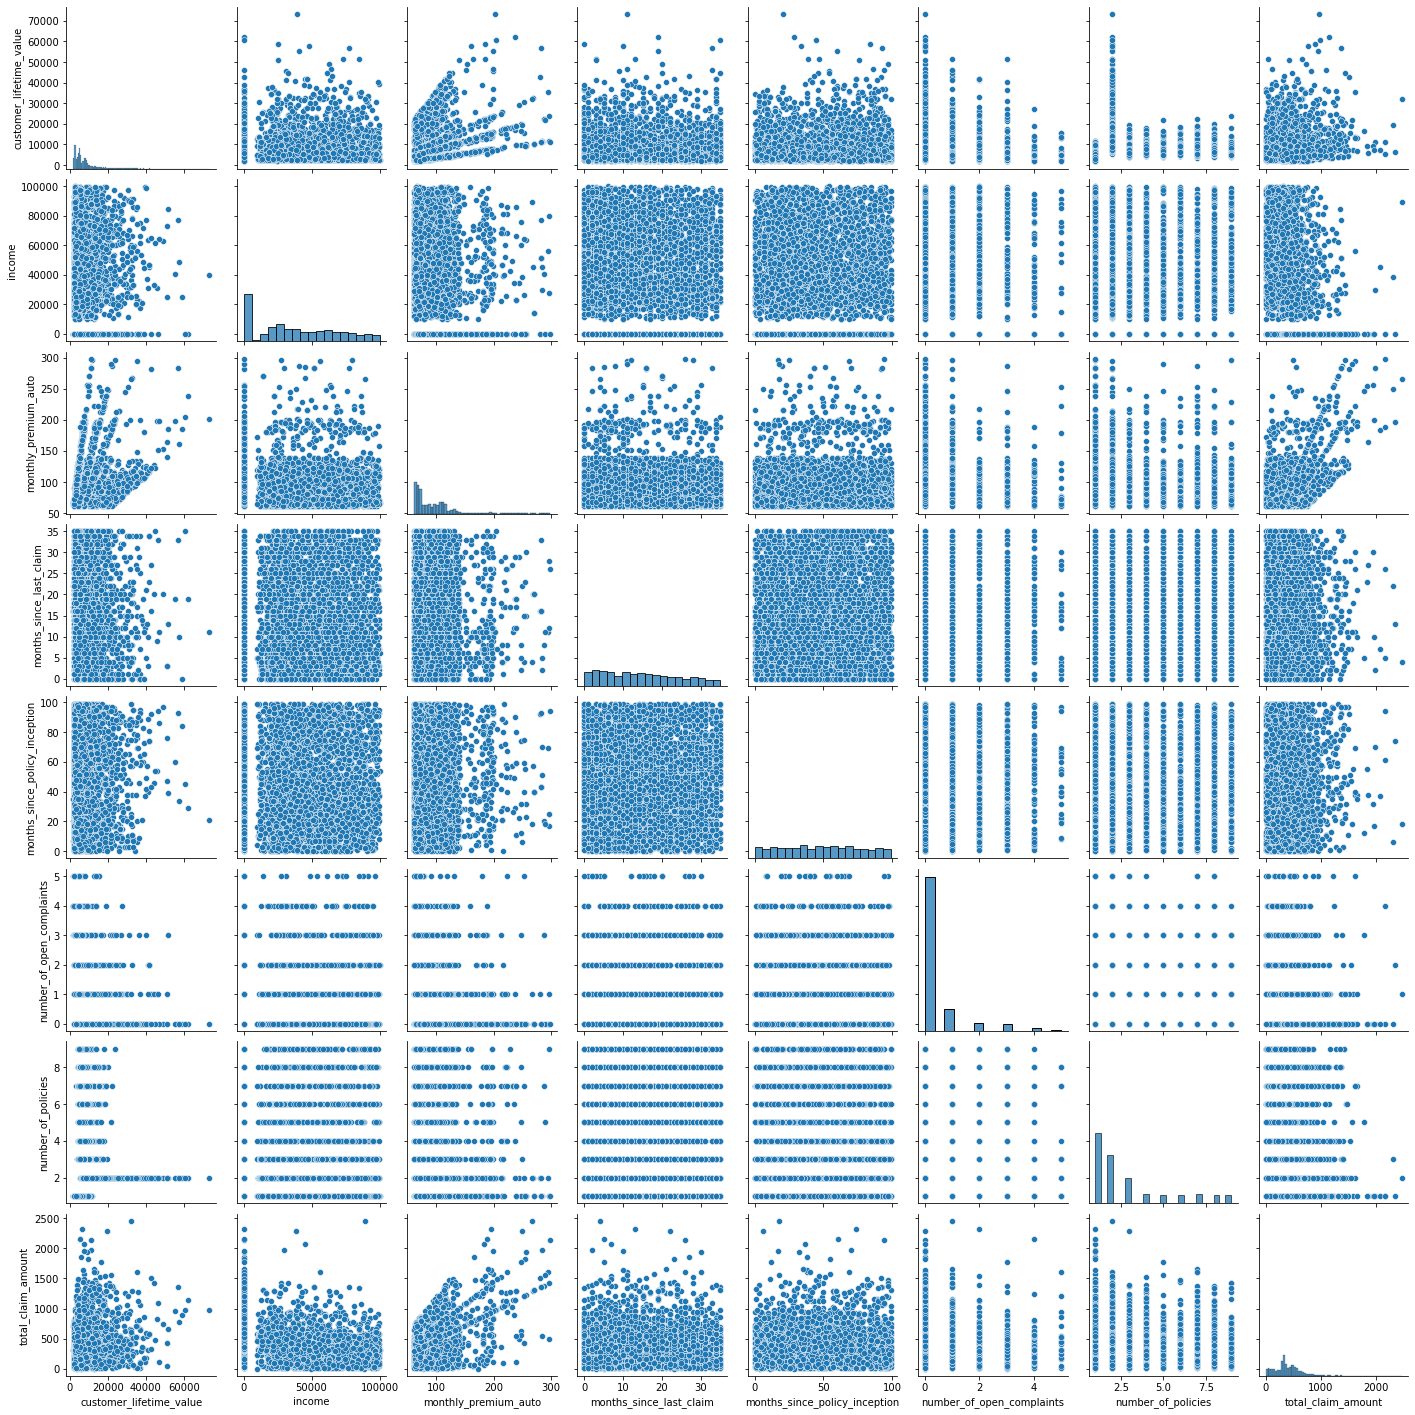

In [25]:
sns.pairplot(df_num);

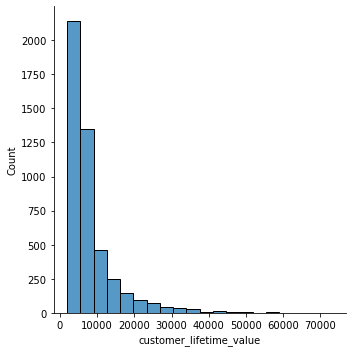

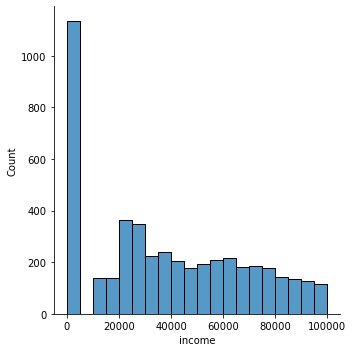

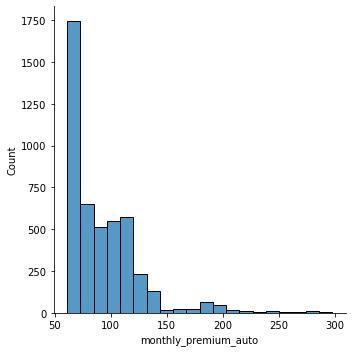

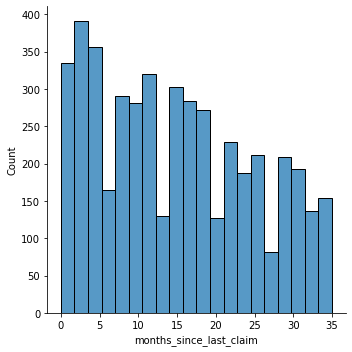

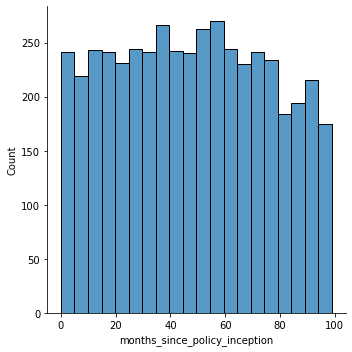

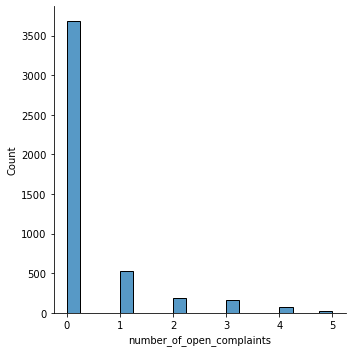

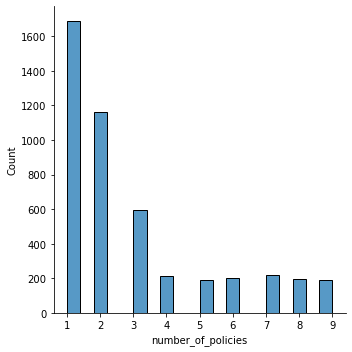

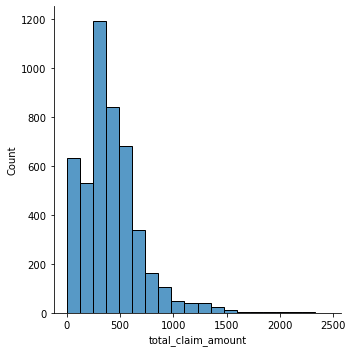

In [26]:
for col in df_num.columns:
    sns.displot(df_num[col], bins=20)
    plt.show ()

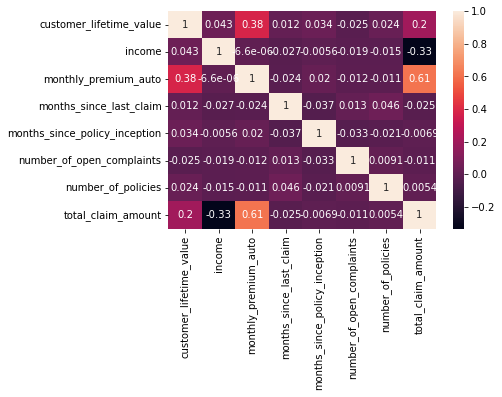

In [27]:
sns.heatmap(df_num.corr (), annot=True);

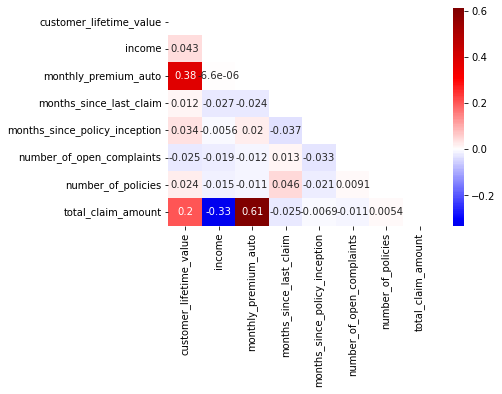

In [28]:
mask=np.zeros_like (df.corr())
mask[np.triu_indices_from (mask)]=True
sns.heatmap(df_num.corr (), mask=mask, annot=True, cmap='seismic', center=0);

In [29]:
# if it´s to small
sns.set (rc={'figure.figsize' : (10,10)}) 

# Identify outliers
- find the percentile 25 and 75
- calculate the IQR (ie diff between 25 and 75)
- limits: any rows under or over the limit are basically outliers.

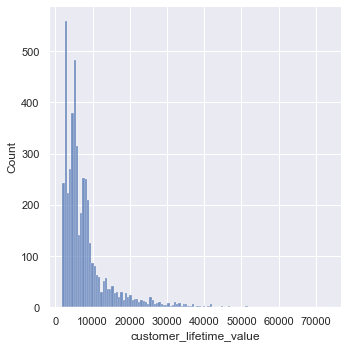

In [30]:
sns.displot(df['customer_lifetime_value'])

<AxesSubplot:xlabel='customer_lifetime_value'>

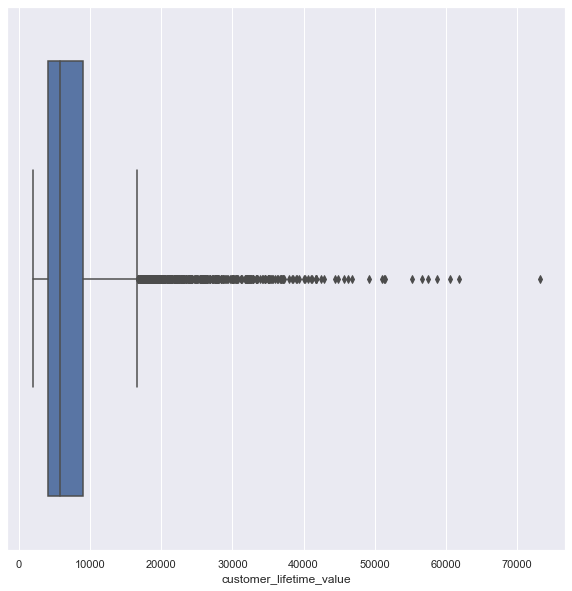

In [31]:
sns.boxplot(x=df['customer_lifetime_value'])

In [32]:
q1=np.percentile(df['customer_lifetime_value'], 25)

In [33]:
q1

4015.54635575

In [34]:
q3=np.percentile(df['customer_lifetime_value'], 75)

In [35]:
q3

9035.671134

In [36]:
iqr=q3-q1

In [37]:
upper_boundary=q3+(1.5*iqr)
lower_boundary=q1-(1.5*iqr)

In [38]:
upper_boundary

16565.858301375

In [39]:
lower_boundary

-3514.640811624999

In [40]:
# defining outliers bottom side
len(df[df['customer_lifetime_value']<lower_boundary])

0

In [41]:
# defining outliers upper side
len(df[df['customer_lifetime_value']>upper_boundary]) 

# in this case you would delete the last 817 rows

429

In [42]:
# example "anything over 50 K is an outlier"
len(df[df['customer_lifetime_value']>50000])

10

In [43]:
df[df['customer_lifetime_value']>50000]

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
2190,California,51337.90677,No,Premium,College,2/24/11,Employed,F,72794,Rural,Single,164,3,47,1,2,Personal Auto,Personal L2,Offer1,50.454459,SUV,Large
2908,Arizona,58753.88046,No,Premium,Bachelor,1/6/11,Employed,F,24964,Suburban,Married,185,0,84,0,2,Personal Auto,Personal L2,Offer2,888.000000,SUV,Medsize
3760,Oregon,61850.18803,No,Extended,College,2/4/11,Unemployed,F,0,Suburban,Married,238,19,29,0,2,Personal Auto,Personal L1,Offer3,1142.400000,Luxury SUV,Medsize
4126,Arizona,60556.19213,No,Extended,College,1/1/11,Unemployed,F,0,Suburban,Married,204,35,45,0,2,Personal Auto,Personal L3,Offer1,979.200000,Luxury SUV,Large
4915,Oregon,56675.93768,No,Premium,College,1/24/11,Employed,F,77237,Suburban,Married,283,33,93,0,2,Personal Auto,Personal L1,Offer4,1358.400000,Luxury SUV,Medsize
6252,California,73225.95652,No,Extended,Bachelor,2/9/11,Employed,F,39547,Suburban,Married,202,11,21,0,2,Personal Auto,Personal L3,Offer1,969.600000,Luxury SUV,Medsize
6461,Oregon,55277.44589,No,Basic,High School or Below,1/30/11,Employed,F,40740,Suburban,Single,198,19,60,0,2,Personal Auto,Personal L2,Offer1,950.400000,Luxury SUV,Large
6554,Arizona,51426.24815,No,Basic,College,1/9/11,Employed,F,84650,Urban,Married,185,13,39,3,2,Personal Auto,Personal L2,Offer1,660.474274,Luxury Car,Medsize
6569,California,51016.06704,No,Premium,Master,2/19/11,Employed,F,25167,Urban,Married,140,3,76,0,2,Personal Auto,Personal L3,Offer2,422.494292,SUV,Small
7556,Oregon,57520.50151,No,Premium,College,1/20/11,Employed,F,48367,Suburban,Married,161,10,34,0,2,Personal Auto,Personal L3,Offer2,772.800000,SUV,Medsize


In [44]:
# power transformation

log transformnop.log() - cannot log transform a null - error
- make a copy of the colmun
- create a log transform function
- apply to the column
- visualise the distribution afterwards
# you convert the scale

In [46]:
def log_transform (x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [47]:
# create a copy of the column in isolation
clv_1=list(map(log_transform,df['customer_lifetime_value']));

In [48]:
# side note : map(arg1=process, arg2 = object)

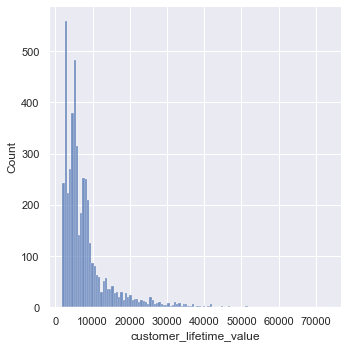

In [49]:
sns.displot(df['customer_lifetime_value']) # old visual

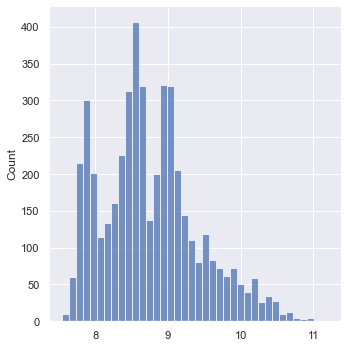

In [50]:
sns.displot(clv_1) # new visual

# Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler as mms

In [52]:
# cust life time value
df['customer_lifetime_value']=mms().fit_transform(df['customer_lifetime_value'].values.reshape(-1,1))

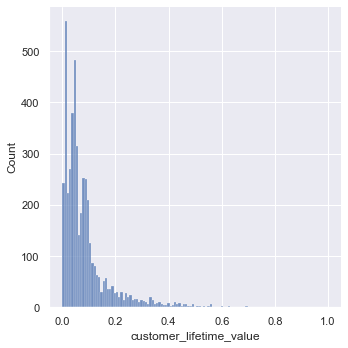

In [53]:
sns.displot(df['customer_lifetime_value']) # old visual

In [54]:
# date field
df['effective_to_date']=pd.to_datetime(df['effective_to_date']).dt.date

In [57]:
# sns.boxplot(data=df['effective_to_date']); # comming back to this later

In [58]:
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [59]:
# apply scaler to all num columns except target
for c in df_num.columns[:-2]:
    df_num[c]=mms().fit_transform(df_num[c].values.reshape(-1,1))

In [60]:
df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.012125,0.562960,0.033755,0.914286,0.050505,0.0,1,384.811147
1,0.071233,0.000000,0.139241,0.371429,0.424242,0.0,8,1131.464935
2,0.154061,0.487860,0.198312,0.514286,0.383838,0.0,2,566.472247
5,0.089133,0.629265,0.033755,0.400000,0.949495,0.0,2,159.383042
6,0.048820,0.553716,0.025316,0.000000,0.131313,0.0,9,321.600000


# Categories

In [61]:
df_cat

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Two-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,California,No,Extended,College,1/17/11,Unemployed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,SUV,Medsize
9122,California,Yes,Extended,College,2/1/11,Retired,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Four-Door Car,Small
9123,California,Yes,Extended,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Four-Door Car,Small
9128,California,No,Premium,College,1/6/11,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Four-Door Car,Large


In [62]:
# drop effective to date
df_cat=df_cat.drop(columns=['effective_to_date'])

In [63]:
df_cat

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Two-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,California,No,Extended,College,Unemployed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,SUV,Medsize
9122,California,Yes,Extended,College,Retired,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Four-Door Car,Small
9123,California,Yes,Extended,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Four-Door Car,Small
9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Four-Door Car,Large


In [67]:
# OHE - one hot encoder
#-OR-
#pd get_dummies

In [68]:
df_cat_enc=pd.get_dummies(df_cat)

In [69]:
df_cat_enc

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_F,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
5,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
6,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
9122,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
9123,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
9128,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


# bring the data back together


In [70]:
# check the shape
df_num.shape

(4658, 8)

In [71]:
df_cat_enc.shape

(4658, 52)

In [72]:
# bring the data back together
df_full=pd.concat([df_num, df_cat_enc],axis=1)

In [73]:
df_full.shape

(4658, 60)

# define x and y

In [74]:
X=df_full.drop(columns=['total_claim_amount'])
y=df_full['total_claim_amount']

# import and apply model

- go to sklearn and select correct model
- define any hyper parameters
- split the data into train and test
- train the model on the training data
- test the model on the test data
- evaluate the model

In [75]:
from sklearn.linear_model import LinearRegression as Lin

In [76]:
from sklearn.model_selection import train_test_split as tts

In [77]:
# define the model
linreg=Lin()

In [78]:
# split the data into TT
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=40)

In [79]:
# train the model on train
linreg.fit(X_train,y_train)

LinearRegression()

In [80]:
# make some predictions on test
y_pred=linreg.predict(X_test)

# compare and evaluate

In [81]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [82]:
r2(y_test,y_pred) # you want to be as close to 1 as possible

0.7723146043373101

In [83]:
mse(y_test,y_pred)

19133.96775164728

In [84]:
mae(y_test,y_pred) # we can predict the total_claim_amount with a 90 euro max difference

90.87635178326181